<a href="https://colab.research.google.com/github/entc-17-fyp-20/ResultsComparison/blob/Kusal/Dilated_CNN_medium_term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
%matplotlib inline
import plotly.express as px
import io


pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv; does not contain current columns
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv
url8 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar.csv'  #Mannar dataset-10_min-wind_speed.csv
url9 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar%20full%20data.csv' #Mannar full data set.csv
url10 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/2018%20Scada%20Data%20of%20a%20Wind%20Turbine%20in%20Turkey.csv' #2018 Scada Data of a Wind Turbine in Turkey - 10 min resolution data
url11 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB%20new%20updated(Only%20actual).csv' #CEB new dataset
url12 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB_dataset_full_august_to_december.csv' #merged CEB dataset
url13 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Belgium_2017_15_min.csv' #Belgium-2017 dataset

In [ ]:
df = pd.read_csv(url13)
df=pd.DataFrame(df)
df_temp=df.copy()
df_temp.count

<bound method DataFrame.count of                         Datetime Resolution code Offshore/onshore    Region  \
0      2017-12-31 23:45:00+01:00           PT15M          Onshore  Flanders   
1      2017-12-31 23:30:00+01:00           PT15M          Onshore  Flanders   
2      2017-12-31 23:15:00+01:00           PT15M          Onshore  Flanders   
3      2017-12-31 23:00:00+01:00           PT15M          Onshore  Flanders   
4      2017-12-31 22:45:00+01:00           PT15M          Onshore  Flanders   
...                          ...             ...              ...       ...   
26399  2017-04-01 01:00:00+02:00           PT15M          Onshore  Flanders   
26400  2017-04-01 00:45:00+02:00           PT15M          Onshore  Flanders   
26401  2017-04-01 00:30:00+02:00           PT15M          Onshore  Flanders   
26402  2017-04-01 00:15:00+02:00           PT15M          Onshore  Flanders   
26403  2017-04-01 00:00:00+02:00           PT15M          Onshore  Flanders   

      Grid connect

In [ ]:
col_1=(df_temp.columns)[0]
col_2=(df_temp.columns)[5]
feature = 'Active Power'
# feature_1 = 'Forecasted Power'
df_temp.rename(columns={col_1 :'Date & Time' , col_2 : feature},inplace=True)
#df

In [ ]:
df_temp=df_temp.set_index('Date & Time')
df_temp=df_temp[::-1]
df_temp

,Resolution code,Offshore/onshore,Region,Grid connection type,Active Power,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
Date & Time,,,,,,,,,,,,,,,,,,,,
2017-04-01 00:00:00+02:00,PT15M,Onshore,Flanders,Elia,2.34,1.95,0.69,3.72,0.84,0.00,2.54,2.44,0.38,4.27,16.11,2.42,29.81,63.01,0.04,0
2017-04-01 00:15:00+02:00,PT15M,Onshore,Flanders,Elia,2.85,2.24,0.64,4.39,1.20,0.01,3.26,2.75,0.43,4.91,16.29,2.50,30.10,63.01,0.05,0
2017-04-01 00:30:00+02:00,PT15M,Onshore,Flanders,Elia,3.60,2.53,0.58,5.06,1.56,0.02,3.97,3.06,0.49,5.54,16.48,2.58,30.39,63.01,0.06,0
2017-04-01 00:45:00+02:00,PT15M,Onshore,Flanders,Elia,3.91,2.82,0.53,5.73,1.93,0.03,4.69,3.38,0.54,6.18,16.66,2.67,30.67,63.01,0.06,0
2017-04-01 01:00:00+02:00,PT15M,Onshore,Flanders,Elia,4.57,3.21,0.48,6.56,2.47,0.04,5.67,3.78,0.61,6.96,16.81,2.73,30.91,63.01,0.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:45:00+01:00,PT15M,Onshore,Flanders,Elia,37.72,43.43,37.61,48.21,44.82,37.26,49.65,44.45,37.22,49.96,30.70,14.10,46.55,53.86,0.70,0
2017-12-31 23:00:00+01:00,PT15M,Onshore,Flanders,Elia,40.59,43.97,38.63,48.30,45.32,38.22,49.63,44.91,38.13,49.94,30.65,13.97,46.55,53.86,0.75,0
2017-12-31 23:15:00+01:00,PT15M,Onshore,Flanders,Elia,41.74,44.45,39.57,48.42,45.75,39.15,49.59,45.35,39.07,49.89,30.59,13.86,46.55,53.86,0.78,0


In [ ]:
scaler = MinMaxScaler()

In [ ]:
df_temp=pd.DataFrame(df_temp[feature])
df_temp[feature] = scaler.fit_transform(df_temp)
df_temp

,Active Power
Date & Time,
2017-04-01 00:00:00+02:00,0.05
2017-04-01 00:15:00+02:00,0.06
2017-04-01 00:30:00+02:00,0.07
2017-04-01 00:45:00+02:00,0.08
2017-04-01 01:00:00+02:00,0.09
...,...
2017-12-31 22:45:00+01:00,0.78
2017-12-31 23:00:00+01:00,0.84
2017-12-31 23:15:00+01:00,0.87


In [ ]:
T = 24
HORIZON = 16

In [ ]:
for i in range(1,HORIZON+1):
  df_temp['y_t+'+str(i)] = df_temp[feature].shift(-i)
df_temp.head(10)

,Active Power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,y_t+10,y_t+11,y_t+12,y_t+13,y_t+14,y_t+15,y_t+16
Date & Time,,,,,,,,,,,,,,,,,
2017-04-01 00:00:00+02:00,0.05,0.06,0.07,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33
2017-04-01 00:15:00+02:00,0.06,0.07,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33,0.31
2017-04-01 00:30:00+02:00,0.07,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33,0.31,0.28
2017-04-01 00:45:00+02:00,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33,0.31,0.28,0.22
2017-04-01 01:00:00+02:00,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33,0.31,0.28,0.22,0.18
2017-04-01 01:15:00+02:00,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33,0.31,0.28,0.22,0.18,0.15
2017-04-01 01:30:00+02:00,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33,0.31,0.28,0.22,0.18,0.15,0.15
2017-04-01 01:45:00+02:00,0.14,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33,0.31,0.28,0.22,0.18,0.15,0.15,0.14
2017-04-01 02:00:00+02:00,0.15,0.15,0.15,0.19,0.19,0.20,0.27,0.33,0.33,0.31,0.28,0.22,0.18,0.15,0.15,0.14,0.13


In [ ]:
for t in range(1, T+1):
    df_temp['active_power_t-'+str(T-t)] = df_temp[feature].shift(T-t)
df_temp = df_temp.rename(columns={feature:'Current_active_power'})
df_temp

,Current_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,active_power_t-9,active_power_t-8,active_power_t-7,active_power_t-6,active_power_t-5,active_power_t-4,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0
Date & Time,,,,,,,,,,,,,,,,,,,,,
2017-04-01 00:00:00+02:00,0.05,0.06,0.07,0.08,0.09,0.11,0.12,0.14,0.15,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05
2017-04-01 00:15:00+02:00,0.06,0.07,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.06
2017-04-01 00:30:00+02:00,0.07,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.06,0.07
2017-04-01 00:45:00+02:00,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.06,0.07,0.08
2017-04-01 01:00:00+02:00,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,...,NaN,NaN,NaN,NaN,NaN,0.05,0.06,0.07,0.08,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:45:00+01:00,0.78,0.84,0.87,0.88,0.84,NaN,NaN,NaN,NaN,NaN,...,0.77,0.79,0.81,0.84,0.83,0.77,0.76,0.80,0.79,0.78
2017-12-31 23:00:00+01:00,0.84,0.87,0.88,0.84,NaN,NaN,NaN,NaN,NaN,NaN,...,0.79,0.81,0.84,0.83,0.77,0.76,0.80,0.79,0.78,0.84
2017-12-31 23:15:00+01:00,0.87,0.88,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.81,0.84,0.83,0.77,0.76,0.80,0.79,0.78,0.84,0.87


In [ ]:
df = df_temp[:25000]
df

,Current_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,active_power_t-9,active_power_t-8,active_power_t-7,active_power_t-6,active_power_t-5,active_power_t-4,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0
Date & Time,,,,,,,,,,,,,,,,,,,,,
2017-04-01 00:00:00+02:00,0.05,0.06,0.07,0.08,0.09,0.11,0.12,0.14,0.15,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05
2017-04-01 00:15:00+02:00,0.06,0.07,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.06
2017-04-01 00:30:00+02:00,0.07,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.06,0.07
2017-04-01 00:45:00+02:00,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.06,0.07,0.08
2017-04-01 01:00:00+02:00,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,0.19,0.20,...,NaN,NaN,NaN,NaN,NaN,0.05,0.06,0.07,0.08,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-17 07:45:00+01:00,0.20,0.16,0.14,0.13,0.13,0.13,0.12,0.12,0.15,0.17,...,0.20,0.11,0.06,0.07,0.10,0.17,0.19,0.18,0.17,0.20
2017-12-17 08:00:00+01:00,0.16,0.14,0.13,0.13,0.13,0.12,0.12,0.15,0.17,0.18,...,0.11,0.06,0.07,0.10,0.17,0.19,0.18,0.17,0.20,0.16
2017-12-17 08:15:00+01:00,0.14,0.13,0.13,0.13,0.12,0.12,0.15,0.17,0.18,0.15,...,0.06,0.07,0.10,0.17,0.19,0.18,0.17,0.20,0.16,0.14


In [ ]:
L=len(df)
valid_start=int(8*L/10)

train,valid=df[:valid_start],df[valid_start:]

In [ ]:
y_train = np.array(train[['y_t+'+str(i) for i in range(1,HORIZON+1)]])
X_train=np.array(train[['active_power_t-'+str(T-t) for t in range(1, T+1)]])

In [ ]:
X_train = X_train.reshape(X_train.shape[0], T, 1)

In [ ]:
print(y_train.shape)
print(X_train.shape)

(20000, 16)
(20000, 24)


In [ ]:
y_valid = np.array(valid[["y_t+"+str(i) for i in range(1,HORIZON+1)]])
X_valid=np.array(valid[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_valid = X_valid.reshape(X_valid.shape[0], T, 1)

In [ ]:
print(y_valid.shape)
print(X_valid.shape)

(5000, 16)
(5000, 24, 1)


In [ ]:
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import LSTM, GRU, Conv1D, Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
BATCH_SIZE = 32
EPOCHS = 50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
LATENT_DIM = 10
KERNEL_SIZE = 2
model = Sequential()
model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=1, input_shape=(T, 1)))
model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=2))
model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=4))
model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=8))
model.add(Flatten())
model.add(Dense(HORIZON, activation='linear'))

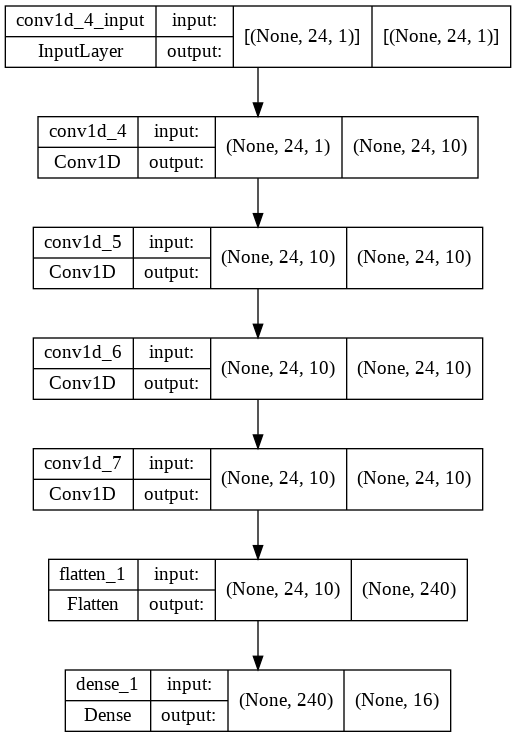

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='RMSprop', loss='mse')
#model.summary()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 24, 10)            30        
                                                                 
 conv1d_5 (Conv1D)           (None, 24, 10)            210       
                                                                 
 conv1d_6 (Conv1D)           (None, 24, 10)            210       
                                                                 
 conv1d_7 (Conv1D)           (None, 24, 10)            210       
                                                                 
 flatten_1 (Flatten)         (None, 240)               0         
                                                                 
 dense_1 (Dense)             (None, 16)                3856      
                                                                 
Total params: 4,516
Trainable params: 4,516
Non-traina

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
history = model.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_valid, y_valid),
                    callbacks=[earlystop],
                    verbose=1)

Epoch 1/50
625/625 [==============================] - 5s 5ms/step - loss: 0.0114 - val_loss: 0.0116
Epoch 2/50
625/625 [==============================] - 4s 7ms/step - loss: 0.0079 - val_loss: 0.0095
Epoch 3/50
625/625 [==============================] - 3s 5ms/step - loss: 0.0076 - val_loss: 0.0113
Epoch 4/50
625/625 [==============================] - 3s 4ms/step - loss: 0.0075 - val_loss: 0.0094
Epoch 5/50
625/625 [==============================] - 3s 4ms/step - loss: 0.0075 - val_loss: 0.0091
Epoch 6/50
625/625 [==============================] - 3s 4ms/step - loss: 0.0074 - val_loss: 0.0104
Epoch 7/50
625/625 [==============================] - 3s 4ms/step - loss: 0.0074 - val_loss: 0.0109
Epoch 8/50
625/625 [==============================] - 4s 7ms/step - loss: 0.0074 - val_loss: 0.0096
Epoch 9/50
625/625 [==============================] - 6s 9ms/step - loss: 0.0074 - val_loss: 0.0090
Epoch 10/50
625/625 [==============================] - 3s 4ms/step - loss: 0.0073 - val_loss: 0.0090

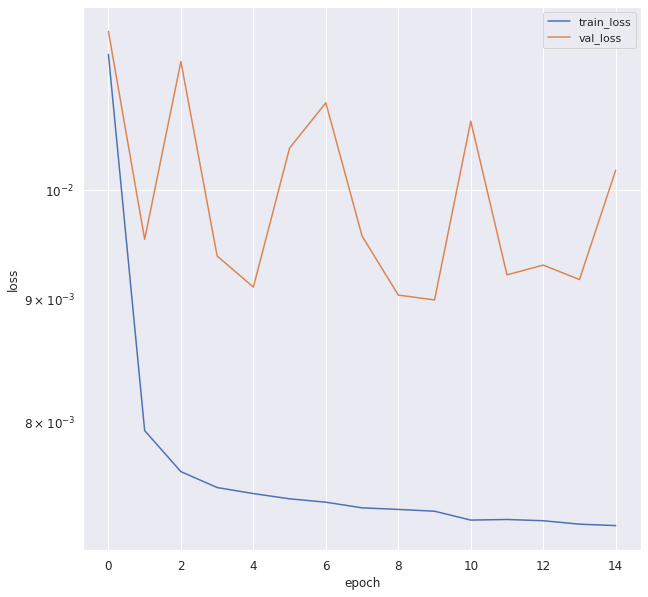

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

In [ ]:
test_set_1 = df_temp[25000:]  #10/1/2021 00:00 to 10/10/2021 23:50
test_set_2 = df_temp[10168:11608] #10/11/2021 00:00 to 10/20/2021 23:50
test_set_3 = df_temp[11608:13048] #10/21/2021 00:00 to 10/30/2021 23:50

dataset_index=1

if dataset_index==1:
  df_test = test_set_1
elif dataset_index==2:
  df_test = test_set_2
elif dataset_index==3:
  df_test = test_set_3

df_test

,Current_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,active_power_t-9,active_power_t-8,active_power_t-7,active_power_t-6,active_power_t-5,active_power_t-4,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0
Date & Time,,,,,,,,,,,,,,,,,,,,,
2017-12-17 14:45:00+01:00,0.14,0.14,0.14,0.15,0.16,0.17,0.17,0.18,0.21,0.24,...,0.10,0.10,0.10,0.09,0.08,0.11,0.12,0.14,0.18,0.14
2017-12-17 15:00:00+01:00,0.14,0.14,0.15,0.16,0.17,0.17,0.18,0.21,0.24,0.25,...,0.10,0.10,0.09,0.08,0.11,0.12,0.14,0.18,0.14,0.14
2017-12-17 15:15:00+01:00,0.14,0.15,0.16,0.17,0.17,0.18,0.21,0.24,0.25,0.27,...,0.10,0.09,0.08,0.11,0.12,0.14,0.18,0.14,0.14,0.14
2017-12-17 15:30:00+01:00,0.15,0.16,0.17,0.17,0.18,0.21,0.24,0.25,0.27,0.31,...,0.09,0.08,0.11,0.12,0.14,0.18,0.14,0.14,0.14,0.15
2017-12-17 15:45:00+01:00,0.16,0.17,0.17,0.18,0.21,0.24,0.25,0.27,0.31,0.33,...,0.08,0.11,0.12,0.14,0.18,0.14,0.14,0.14,0.15,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 18:45:00+01:00,0.62,0.67,0.68,0.78,0.81,0.76,0.74,0.77,0.79,0.81,...,0.55,0.49,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62
2017-12-31 19:00:00+01:00,0.67,0.68,0.78,0.81,0.76,0.74,0.77,0.79,0.81,0.84,...,0.49,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62,0.67
2017-12-31 19:15:00+01:00,0.68,0.78,0.81,0.76,0.74,0.77,0.79,0.81,0.84,0.83,...,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62,0.67,0.68


In [ ]:
feature = "Current_active_power"
count = (df_test[feature] == 0).sum()
count

0

In [ ]:
df_test=df_test[775:]

In [ ]:
df_test

,Current_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,active_power_t-9,active_power_t-8,active_power_t-7,active_power_t-6,active_power_t-5,active_power_t-4,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0
Date & Time,,,,,,,,,,,,,,,,,,,,,
2017-12-25 16:30:00+01:00,0.59,0.59,0.65,0.69,0.68,0.71,0.69,0.65,0.63,0.63,...,0.64,0.60,0.60,0.60,0.62,0.64,0.63,0.61,0.62,0.59
2017-12-25 16:45:00+01:00,0.59,0.65,0.69,0.68,0.71,0.69,0.65,0.63,0.63,0.62,...,0.60,0.60,0.60,0.62,0.64,0.63,0.61,0.62,0.59,0.59
2017-12-25 17:00:00+01:00,0.65,0.69,0.68,0.71,0.69,0.65,0.63,0.63,0.62,0.60,...,0.60,0.60,0.62,0.64,0.63,0.61,0.62,0.59,0.59,0.65
2017-12-25 17:15:00+01:00,0.69,0.68,0.71,0.69,0.65,0.63,0.63,0.62,0.60,0.61,...,0.60,0.62,0.64,0.63,0.61,0.62,0.59,0.59,0.65,0.69
2017-12-25 17:30:00+01:00,0.68,0.71,0.69,0.65,0.63,0.63,0.62,0.60,0.61,0.63,...,0.62,0.64,0.63,0.61,0.62,0.59,0.59,0.65,0.69,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 18:45:00+01:00,0.62,0.67,0.68,0.78,0.81,0.76,0.74,0.77,0.79,0.81,...,0.55,0.49,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62
2017-12-31 19:00:00+01:00,0.67,0.68,0.78,0.81,0.76,0.74,0.77,0.79,0.81,0.84,...,0.49,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62,0.67
2017-12-31 19:15:00+01:00,0.68,0.78,0.81,0.76,0.74,0.77,0.79,0.81,0.84,0.83,...,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62,0.67,0.68


In [ ]:
df_test[feature]=df_test[feature].replace(to_replace=0, method='ffill').values

In [ ]:
y_test = np.array(df_test[['y_t+'+str(i) for i in range(1,HORIZON+1)]])
X_test=np.array(df_test[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_test = X_test.reshape(X_test.shape[0], T, 1)

In [ ]:
print(y_test.shape)
print(X_test.shape)

(590, 16)
(590, 24, 1)


In [ ]:
predictions = model.predict(X_test)
predictions=pd.DataFrame(predictions)
print(predictions)

      0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0   0.64 0.64 0.63 0.64 0.62 0.61 0.61 0.60 0.60 0.61 0.60 0.59 0.58 0.59   
1   0.65 0.65 0.64 0.63 0.62 0.61 0.61 0.60 0.60 0.60 0.58 0.58 0.58 0.58   
2   0.72 0.71 0.70 0.71 0.68 0.69 0.67 0.66 0.66 0.65 0.66 0.66 0.66 0.65   
3   0.75 0.75 0.75 0.75 0.75 0.73 0.72 0.71 0.71 0.72 0.71 0.72 0.71 0.71   
4   0.73 0.74 0.73 0.73 0.73 0.71 0.70 0.69 0.69 0.69 0.70 0.70 0.70 0.68   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
585 0.66 0.67 0.68 0.67 0.66 0.66 0.65 0.64 0.65 0.67 0.68 0.68 0.65 0.66   
586 0.74 0.73 0.73 0.73 0.73 0.73 0.72 0.71 0.72 0.74 0.74 0.73 0.73 0.72   
587 0.75 0.75 0.75 0.76 0.75 0.75 0.72 0.72 0.72 0.74 0.76 0.75 0.74 0.75   
588 0.85 0.85 0.85 0.85 0.85 0.85 0.82 0.81 0.84 0.84 0.85 0.86 0.85 0.84   
589 0.88 0.89 0.89 0.88 0.89 0.89 0.87 0.86 0.87 0.87 0.89 0.89 0.89 0.88   

      14   15  
0   0.59 0.58  
1   0.58 0.57  
2   0.65 0.64  
3   0.70 0.

In [ ]:
x = pd.DataFrame()
x['Date & Time'] = df_test.index
x['Current output power']= np.array(df_test['Current_active_power'])
# x['Current output power']=scaler.inverse_transform(np.array(x[['Current output power']]))
for i in range(1,HORIZON+1):
  x['predictions t+'+str(i)]=predictions[i-1]
  # x[['predictions t+'+str(i)]]=scaler.inverse_transform(np.array(x[['predictions t+'+str(i)]]))
  x['actual t+'+str(i)]=pd.DataFrame(y_test)[i-1]
  # x[['actual t+'+str(i)]]=scaler.inverse_transform(np.array(x[['actual t+'+str(i)]]))
  
x

,Date & Time,Current output power,predictions t+1,actual t+1,predictions t+2,actual t+2,predictions t+3,actual t+3,predictions t+4,actual t+4,...,predictions t+12,actual t+12,predictions t+13,actual t+13,predictions t+14,actual t+14,predictions t+15,actual t+15,predictions t+16,actual t+16
0,2017-12-25 16:30:00+01:00,0.59,0.64,0.59,0.64,0.65,0.63,0.69,0.64,0.68,...,0.59,0.61,0.58,0.63,0.59,0.64,0.59,0.68,0.58,0.67
1,2017-12-25 16:45:00+01:00,0.59,0.65,0.65,0.65,0.69,0.64,0.68,0.63,0.71,...,0.58,0.63,0.58,0.64,0.58,0.68,0.58,0.67,0.57,0.72
2,2017-12-25 17:00:00+01:00,0.65,0.72,0.69,0.71,0.68,0.70,0.71,0.71,0.69,...,0.66,0.64,0.66,0.68,0.65,0.67,0.65,0.72,0.64,0.65
3,2017-12-25 17:15:00+01:00,0.69,0.75,0.68,0.75,0.71,0.75,0.69,0.75,0.65,...,0.72,0.68,0.71,0.67,0.71,0.72,0.70,0.65,0.70,0.62
4,2017-12-25 17:30:00+01:00,0.68,0.73,0.71,0.74,0.69,0.73,0.65,0.73,0.63,...,0.70,0.67,0.70,0.72,0.68,0.65,0.68,0.62,0.68,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,2017-12-31 18:45:00+01:00,0.62,0.66,0.67,0.67,0.68,0.68,0.78,0.67,0.81,...,0.68,0.77,0.65,0.76,0.66,0.80,0.68,0.79,0.69,0.78
586,2017-12-31 19:00:00+01:00,0.67,0.74,0.68,0.73,0.78,0.73,0.81,0.73,0.76,...,0.73,0.76,0.73,0.80,0.72,0.79,0.74,0.78,0.73,0.84
587,2017-12-31 19:15:00+01:00,0.68,0.75,0.78,0.75,0.81,0.75,0.76,0.76,0.74,...,0.75,0.80,0.74,0.79,0.75,0.78,0.74,0.84,0.74,0.87
588,2017-12-31 19:30:00+01:00,0.78,0.85,0.81,0.85,0.76,0.85,0.74,0.85,0.77,...,0.86,0.79,0.85,0.78,0.84,0.84,0.83,0.87,0.84,0.88


In [ ]:
row_1=x.iloc[0]

In [ ]:
def mae(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) 
def rmse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    x=np.mean((actual - pred)**2)
    return np.sqrt(x)
def mse(actual,pred):
    actual, pred = np.array(actual), np.array(pred)
    return(np.mean((actual - pred)**2))

from sklearn.metrics import r2_score

In [ ]:
actual = np.array(row_1[["actual t+"+str(i) for i in range(1,HORIZON+1)]])
pred = np.array(row_1[["predictions t+"+str(i) for i in range(1,HORIZON+1)]])
print(mae(actual, pred))
print(rmse(actual,pred))
print(mse(actual,pred))
print('R^2 for model = '+ str(round(r2_score(actual, pred),2)))

0.07132975700661676
0.05535060340730652
0.0030636892975529325
R^2 for model = -1.48


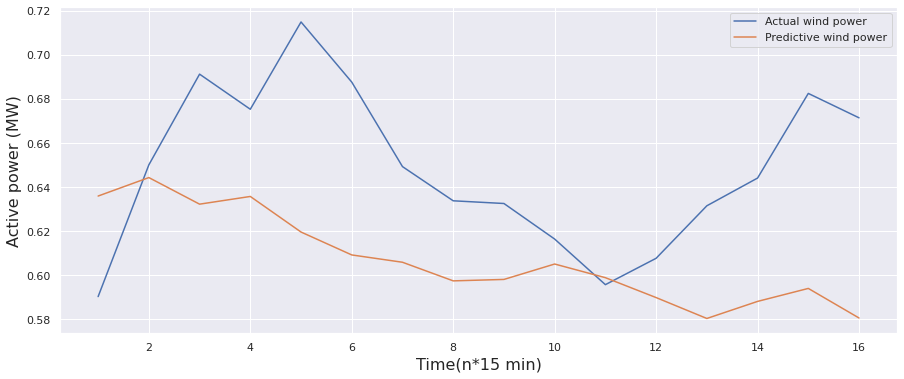

In [ ]:
row=x.iloc[0]

y_axis_actual = np.array(row[["actual t+"+str(i) for i in range(1,HORIZON+1)]])
y_axis_pred = np.array(row[["predictions t+"+str(i) for i in range(1,HORIZON+1)]])
x_axis = np.array([i for i in range(1,HORIZON+1)])
plt.figure(figsize=(15,6))
plt.xlabel("Time(n*15 min)", fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.plot(x_axis,y_axis_actual)
plt.plot(x_axis,y_axis_pred)
plt.legend(["Actual wind power", 'Predictive wind power'])
plt.savefig("results.png")
plt.show()

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Weights/Medium term/Dilated_CNN.h5'
model.save(path)

In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/Medium term/Dilated_CNN.h5')

In [ ]:
test = pd.read_csv(url13)
test = test[::-1]
col_0=(test.columns)[0]
col_1=(test.columns)[5]
#col_2=(test.columns)[19]
feature_0 = 'Date & Time'
feature_1 = 'Active_Power'
#feature_2 = 'Wind_speed'
test.rename(columns={col_0 : feature_0 , col_1 : feature_1 },inplace=True)
# print(test)
test['Date & Time'] = pd.to_datetime(test['Date & Time']) 
# print(test)
#test[feature_1]=test[feature_1].div(1000)
# print(test)
test.set_index(feature_0,inplace=True) 
test=pd.DataFrame(test[feature_1])

In [ ]:
scaler = MinMaxScaler()
test=pd.DataFrame(test[feature_1])
test[feature_1] = scaler.fit_transform(test)

In [ ]:
for i in range(1,HORIZON+1):
  test['y_t+'+str(i)] = test[feature_1].shift(-i)
for t in range(1, T+1):
    test['active_power_t-'+str(T-t)] = test[feature_1].shift(T-t)
test = test.rename(columns={feature_1:'Current_active_power'})
test = test.dropna(how='any')
test

,Current_active_power,y_t+1,active_power_t-23,active_power_t-22,active_power_t-21,active_power_t-20,active_power_t-19,active_power_t-18,active_power_t-17,active_power_t-16,...,active_power_t-9,active_power_t-8,active_power_t-7,active_power_t-6,active_power_t-5,active_power_t-4,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0
Date & Time,,,,,,,,,,,,,,,,,,,,,
2017-04-01 05:45:00+02:00,0.14,0.13,0.05,0.06,0.07,0.08,0.09,0.11,0.12,0.14,...,0.27,0.33,0.33,0.31,0.28,0.22,0.18,0.15,0.15,0.14
2017-04-01 06:00:00+02:00,0.13,0.11,0.06,0.07,0.08,0.09,0.11,0.12,0.14,0.15,...,0.33,0.33,0.31,0.28,0.22,0.18,0.15,0.15,0.14,0.13
2017-04-01 06:15:00+02:00,0.11,0.12,0.07,0.08,0.09,0.11,0.12,0.14,0.15,0.15,...,0.33,0.31,0.28,0.22,0.18,0.15,0.15,0.14,0.13,0.11
2017-04-01 06:30:00+02:00,0.12,0.16,0.08,0.09,0.11,0.12,0.14,0.15,0.15,0.15,...,0.31,0.28,0.22,0.18,0.15,0.15,0.14,0.13,0.11,0.12
2017-04-01 06:45:00+02:00,0.16,0.21,0.09,0.11,0.12,0.14,0.15,0.15,0.15,0.19,...,0.28,0.22,0.18,0.15,0.15,0.14,0.13,0.11,0.12,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:30:00+01:00,0.79,0.78,0.49,0.48,0.47,0.50,0.52,0.59,0.61,0.60,...,0.74,0.77,0.79,0.81,0.84,0.83,0.77,0.76,0.80,0.79
2017-12-31 22:45:00+01:00,0.78,0.84,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62,...,0.77,0.79,0.81,0.84,0.83,0.77,0.76,0.80,0.79,0.78
2017-12-31 23:00:00+01:00,0.84,0.87,0.47,0.50,0.52,0.59,0.61,0.60,0.62,0.67,...,0.79,0.81,0.84,0.83,0.77,0.76,0.80,0.79,0.78,0.84


In [ ]:
test.iloc[25775]

Current_active_power   0.59
y_t+1                  0.59
active_power_t-23      0.56
active_power_t-22      0.58
active_power_t-21      0.57
active_power_t-20      0.62
active_power_t-19      0.62
active_power_t-18      0.61
active_power_t-17      0.62
active_power_t-16      0.57
active_power_t-15      0.56
active_power_t-14      0.52
active_power_t-13      0.57
active_power_t-12      0.58
active_power_t-11      0.60
active_power_t-10      0.66
active_power_t-9       0.64
active_power_t-8       0.60
active_power_t-7       0.60
active_power_t-6       0.60
active_power_t-5       0.62
active_power_t-4       0.64
active_power_t-3       0.63
active_power_t-2       0.61
active_power_t-1       0.62
active_power_t-0       0.59
Name: 2017-12-25 16:30:00+01:00, dtype: float64

In [ ]:
test = test[25775:25795] 

In [ ]:
X_test,Y_test = data_prepare(test,"active_power")

In [ ]:
print(X_test.shape,Y_test.shape)

(20, 24, 1) (20, 1)


In [ ]:
X_test[0].shape

(24, 1)

In [ ]:
eval_df_pred=[]
for i in range(20):
    row = X_test[i]
    row=row.reshape(1,T,1)
    pred=[]
    for j in range(16):
      predictions = model.predict(row)
      pred.append(list(predictions.ravel())[0])
      k = list(row.ravel())
      del k[0]
      k.append(predictions.ravel()[0])
      k = np.array(k).reshape(1,T,1)
      row = k
    eval_df_pred.append(pred)
predictions = pd.DataFrame(eval_df_pred)
eval_df = pd.DataFrame()
for i in range(1,17):
  eval_df['predictions t+'+str(i)]=predictions[i-1]
  eval_df[['predictions t+'+str(i)]]=scaler.inverse_transform(np.array(eval_df[['predictions t+'+str(i)]]))

In [ ]:
for i in range(1,17):
  eval_df['actual_t+'+str(i)] = test['Current_active_power'].shift(i)

In [ ]:
eval_df

,predictions t+1,predictions t+2,predictions t+3,predictions t+4,predictions t+5,predictions t+6,predictions t+7,predictions t+8,predictions t+9,predictions t+10,...,actual_t+7,actual_t+8,actual_t+9,actual_t+10,actual_t+11,actual_t+12,actual_t+13,actual_t+14,actual_t+15,actual_t+16
0,27.87,27.19,27.17,27.15,27.00,26.92,26.84,26.60,26.46,26.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27.96,27.94,27.84,27.66,27.54,27.45,27.21,27.10,26.73,26.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33.22,34.24,34.93,35.89,36.74,37.43,37.96,38.31,38.80,39.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34.37,35.10,36.09,36.95,37.62,38.12,38.44,38.92,39.32,39.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32.02,31.94,32.02,31.89,32.05,32.28,32.42,32.08,31.87,31.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,35.99,36.98,37.60,38.29,38.62,39.22,39.48,40.09,40.38,40.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,32.73,32.45,32.74,32.86,33.15,32.90,33.07,32.42,32.29,31.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,30.36,30.13,29.70,29.47,29.10,29.20,28.67,28.59,28.22,28.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,30.39,29.98,29.73,29.35,29.42,28.88,28.80,28.44,28.27,27.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,30.11,29.87,29.48,29.54,28.99,28.90,28.54,28.38,28.01,28.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
